In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

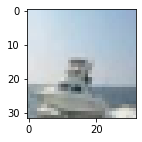

In [4]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[100])

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

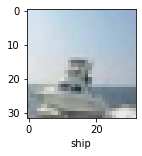

In [8]:
plot_sample(X_train, y_train, 100)

In [9]:
X_train = X_train /255
X_test = X_test / 255

In [10]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype='float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

2022-09-27 11:10:28.088625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-27 11:10:28.161804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-27 11:10:28.161960: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-27 11:10:28.162997: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [12]:
cnn.fit(X_train, y_train, epochs=50)

2022-09-27 11:10:29.646699: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-09-27 11:10:30.071375: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50


2022-09-27 11:10:32.081879: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-09-27 11:10:33.155967: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1563/1563 [==============================] - 7s 3ms/step - loss: 1.5291 - accuracy: 0.4481
Epoch 2/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1710 - accuracy: 0.5873
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.0451 - accuracy: 0.6363
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9598 - accuracy: 0.6666
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8950 - accuracy: 0.6904
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8418 - accuracy: 0.7096
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8068 - accuracy: 0.7198
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7621 - accuracy: 0.7374
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7275 - accuracy: 0.7490
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6974 - accurac

In [13]:
cnn.evaluate(X_test, y_test)

2022-09-27 11:14:43.234589: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.
2022-09-27 11:14:43.391979: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 2.5988 - accuracy: 0.6587


[2.5987706184387207, 0.6586999893188477]

In [14]:
y_pred = cnn.predict(X_test)
y_pred[:5]

 40/313 [==>...........................] - ETA: 0s 

2022-09-27 11:17:12.082368: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 1ms/step


array([[7.52569719e-13, 1.26774296e-06, 8.49907276e-13, 9.99998569e-01,
        8.91705286e-12, 1.92499012e-08, 5.54808892e-08, 1.32662136e-11,
        1.37252547e-08, 1.90298071e-08],
       [1.00365549e-09, 1.09607709e-06, 1.51673113e-20, 1.79312325e-18,
        9.95869215e-22, 1.45315522e-13, 2.82853325e-25, 3.11446703e-22,
        9.99998927e-01, 1.30552434e-14],
       [2.02104263e-03, 3.94485258e-02, 1.43502068e-11, 5.78819993e-07,
        3.12357279e-10, 1.97993647e-02, 2.70675545e-14, 1.22937355e-11,
        9.38730478e-01, 1.30483500e-08],
       [9.99999523e-01, 2.76227716e-08, 3.06255941e-07, 1.89617366e-09,
        1.60818487e-07, 5.48945778e-10, 1.08868901e-18, 2.39292440e-15,
        2.26371610e-09, 4.50872985e-11],
       [2.85033441e-25, 7.08115858e-11, 3.25297660e-05, 4.32843733e-10,
        9.99967456e-01, 7.33110531e-19, 3.05256598e-10, 9.88059870e-26,
        1.57405089e-09, 1.66690707e-21]], dtype=float32)

In [15]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [19]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

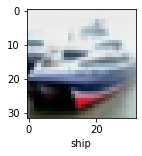

In [21]:
plot_sample(X_test, y_test, 1)

In [22]:
classes[y_classes[1]]

'ship'

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1000
           1       0.78      0.78      0.78      1000
           2       0.51      0.60      0.55      1000
           3       0.52      0.44      0.48      1000
           4       0.58      0.61      0.59      1000
           5       0.53      0.56      0.54      1000
           6       0.76      0.70      0.73      1000
           7       0.69      0.69      0.69      1000
           8       0.74      0.80      0.77      1000
           9       0.78      0.73      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000

